# YOLOv3

 YOLOv3 đưa ra những sự điều chỉnh nhỏ so với phiên bản trước đó, không có điều gì thực sự mang tính đột phá hay thú vị cả.

### Bounding Box

YOLOv3 sẽ dự đoán bounding box với objectness score bằng các phương pháp khác nhau.

YOLOv3 dự đoán objectness score cho mỗi bounding box bằng logistic regression thay vì hàm sigmoid của YOLOv2. Ý tưởng này được lấy từ Faster R-CNN:
- Giá trị này sẽ bằng 1 (positive label) nếu anchor box dùng để dự đoán bounding box đó có độ trùng khớp (overlap) so với ground truth box lớn hơn tât cả những bounding box khác.
- Nếu một bounding box không phải là tốt nhất nhưng có độ trùng khớp với ground truth box lớn hơn một ngưỡng (threshold) nào đó, thì ta sẽ bỏ qua dự đoán bounding box đó trong quá trình huấn luyện. YOLOv3 sử dụng threshold bằng 0.5
- Ngược lại, giá trị này sẽ bằng 0

Ngoài ra, YOLOv3 còn thực hiện một số điều chỉnh nhỏ so với Faster R-CNN:
- Chỉ gán một anchor box cho mỗi ground truth object.
- Nếu một anchor box không được gán cho bất cứ ground truth object nào thì nó sẽ không gây ra mất mát (loss) gì cho giá trị tọa độ hay dự đoán class mà chỉ gây ra mất mát cho objectness (có object hay không).

### Class prediction

Mỗi bounding box sẽ dự đoán các class sử dụng phương pháp Multilabel Classification. Hàm softmax không còn được sử dụng nữa do nhận thấy nó không mang lại performance tốt. Thay vào đó, independent logistic classifiers được sử dụng thay cho hàm softmax.

Loss Binary Cross-Entropy được sử dụng để huấn luyện mô hình.

### Predict với độ phân giải khác nhau

YOLOv3 dự đoán các bounding box tại 3 scale (độ phóng đại) khác nhau của feature map. Model sẽ trích xuất features từ các scale này sử dụng cơ chế tương tự như mạng Feature Pyramid Networks (FPN). Cơ chế này được mô tả như sau:
- Từ base feature extractor, một vài Convolutional Layers được thêm vào. Convolutional layer cuối cùng sẽ dự đoán một tensor 3 chiều chứa thông tin về bounding box, objectness, và class predictions
- Tiếp theo, ta lấy feature map từ 2 layer trước đó và upsample nó lên gấp đôi. Ta cũng lấy một feature map từ lớp trước nữa trong network và hợp nhất nó với feature map được upsample ban nãy:
    + Nhiều thông tin ngữ nghĩa (semantic information) có ý nghĩa hơn từ upsampled feature map
    + Thông tin có độ chi tiết hơn (finer-grained information) từ feature map ở lớp trước đó.

### Feature Extractor

YOLOv3 sử dụng một network mới để thực hiện feature extraction - được gọi là Darknet-53 - bao gồm 53 Convolutional Layers, lớn hơn đáng kể so với Darknet-19 của YOLOv2 - chỉ bao gồm 19 Convolutional Layers. Là một phương pháp lai giữa Darknet-19 và Residual Networks (ResNets):

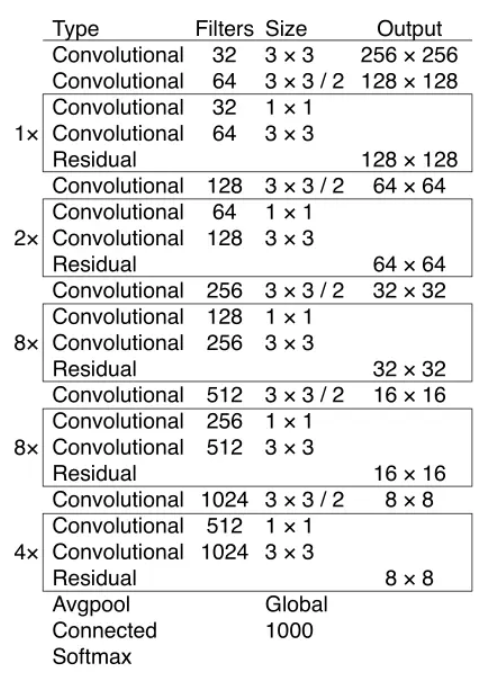